# Simulations

In [1]:
import matplotlib.pyplot as plt

from neurodsp.sim import sim_oscillation
from neurodsp.utils import create_times
from neurodsp.plts import plot_time_series

from fooof import FOOOF
from fooof.sim import *
from fooof.sim.params import Stepper, param_iter
from fooof.plts import plot_spectra

In [9]:
import seaborn as sns
sns.set_context('talk')

## Settings

In [10]:
SAVE_FIG = False

In [11]:
fs = 1000
n_seconds = 2

## Simulations

In [12]:
times = create_times(n_seconds, fs)

sig = sim_oscillation(n_seconds, fs, 10)

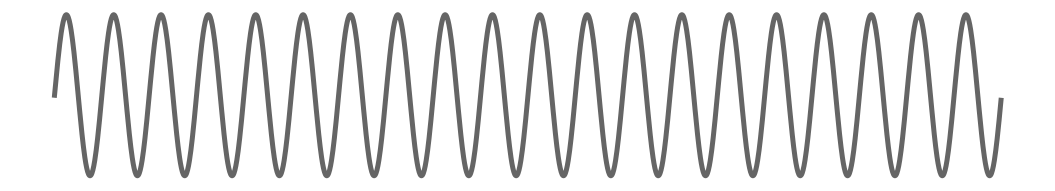

In [13]:
plot_time_series(times, sig, alpha=0.6, lw=5)
plt.axis('off');
plt.tight_layout()
if SAVE_FIG:
    plt.savefig('oscillation.pdf')

## Next

In [14]:
# Define 
FREQ_RANGE = [2, 30]
EXP_DEF = [0, 0.75]

# The Stepper object iterates through a range of values
pw_step = Stepper(0, 0.5, 0.05)
num_spectra = len(pw_step)

# `param_iter` creates a generator can be used to step across ranges of parameters
pw_iter = param_iter([10, pw_step, 1])

# Simulate power spectra
pw_fs, pw_ps = gen_group_power_spectra(num_spectra, FREQ_RANGE, EXP_DEF, pw_iter, nlvs=0.01)

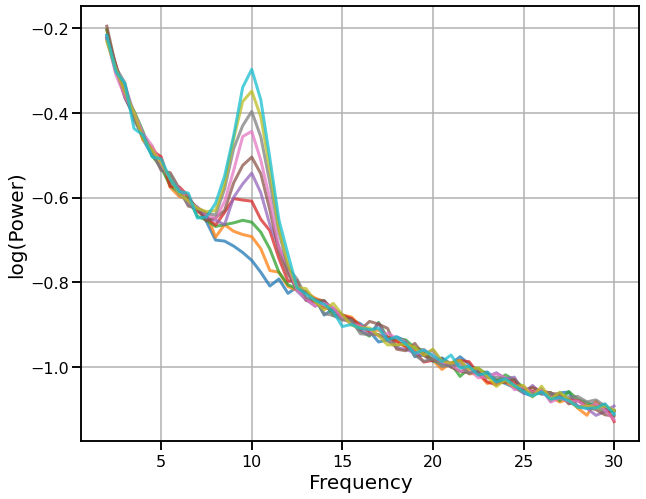

In [15]:
# Plot our series of generated power spectra, with varying high-band power
plot_spectra(pw_fs, pw_ps, log_powers=True, lw=3, alpha=0.75)
if SAVE_FIG:
    plt.savefig('alphas.pdf')

In [18]:
# import matplotlib as mpl
# mpl.rc('image', cmap='gray')